In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


(3000, 1)


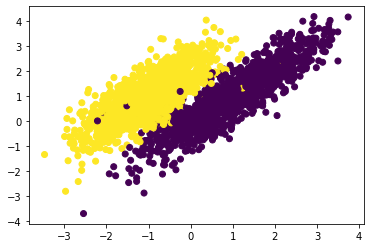

In [3]:
dfx = pd.read_csv('./Train/Logistic_X_Train.csv')
dfy = pd.read_csv('./Train/Logistic_Y_Train.csv')
X_train = dfx.values
Y_train = dfy.values.reshape(-1)
print(dfy.shape)
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)

In [4]:
def hypothesis(x,w,b):
    hx = np.dot(x,w)+b
    return sigmoid(hx)
    


In [5]:
def sigmoid(hx):
    return 1.0/(1.0+np.exp(-1.0*hx))



In [6]:
def error(x,y,w,b):
    m = x.shape[0]
    n = x.shape[1]
    err = 0.0
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        err += y[i]*np.log2(hx) + (1-y[i])*np.log2(1-hx)
    return err/m
    

In [7]:
def get_grad(x,y,w,b):
    m = x.shape[0]
    n = x.shape[1]
    grad_b = 0.0
    grad_w = np.zeros(w.shape)
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        for j in range(n):
            grad_w[j] += ((y[i] - hx)*x[i][j])/m
        grad_b += (y[i]-hx)
        
    grad_b /=m
    return [grad_w,grad_b]

In [8]:
def gradient_ascent(x,y,w,b,learning_rate = 0.01):
    err = error(x,y,w,b)
    [grad_w,grad_b] = get_grad(x,y,w,b)
    for i in range(w.shape[0]):
        w[i] = w[i] + learning_rate*grad_w[i]
    b = b + learning_rate*grad_b
    return err,w,b
    

In [9]:
def predict(x,w,b):
    confidence = hypothesis(x,w,b)
    if(confidence<0.5):
        return 0
    else:
        return 1

In [10]:
def accuracy(x_tst,y_tst,w,b):
    y_pred = []
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i],w,b)
        y_pred.append(p)
    y_pred = np.array(y_pred)
    
    return float((y_pred==y_tst).sum())/y_tst.shpae[0]

In [11]:
loss = []
acc = []
w = 2*np.random.random((X_train.shape[1],))
b = 5*np.random.random()

In [12]:
for i in range(1000):
    err,w,b = gradient_ascent(X_train,Y_train,w,b,learning_rate = 0.1)
    loss.append(err)

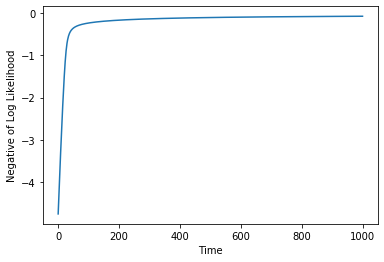

In [13]:
plt.plot(loss)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.show()

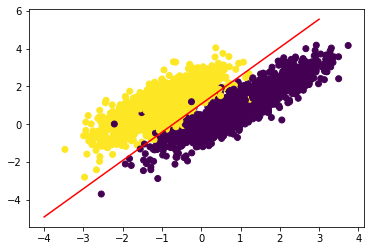

In [24]:
x = np.linspace(-4,3,10)
y = -(w[0]*x + b)/w[1]

plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.plot(x,y,color='red')
plt.show()